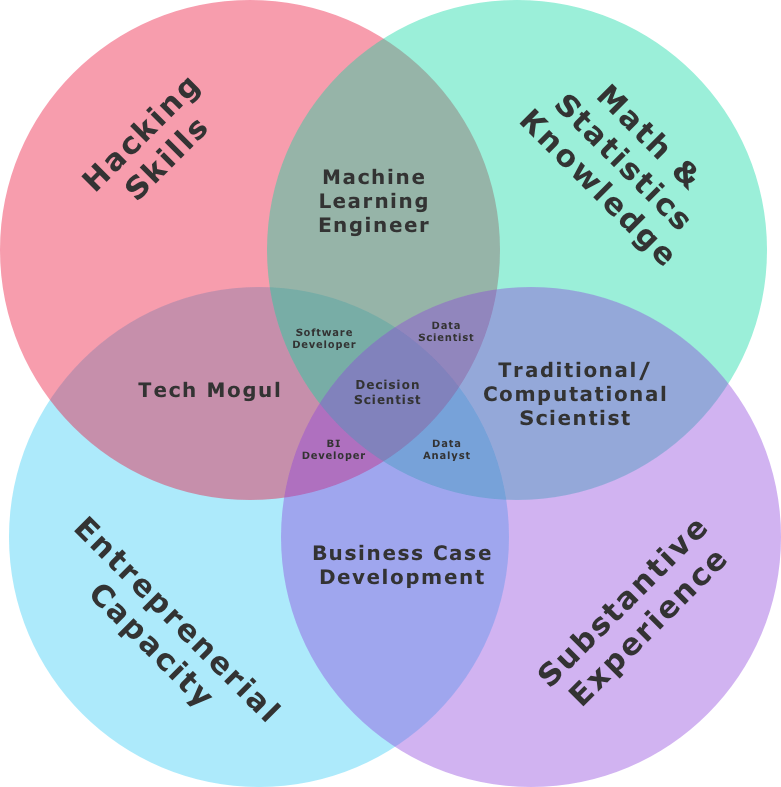

In [1]:
from IPython.display import Image
Image(filename="data Scientish.png")

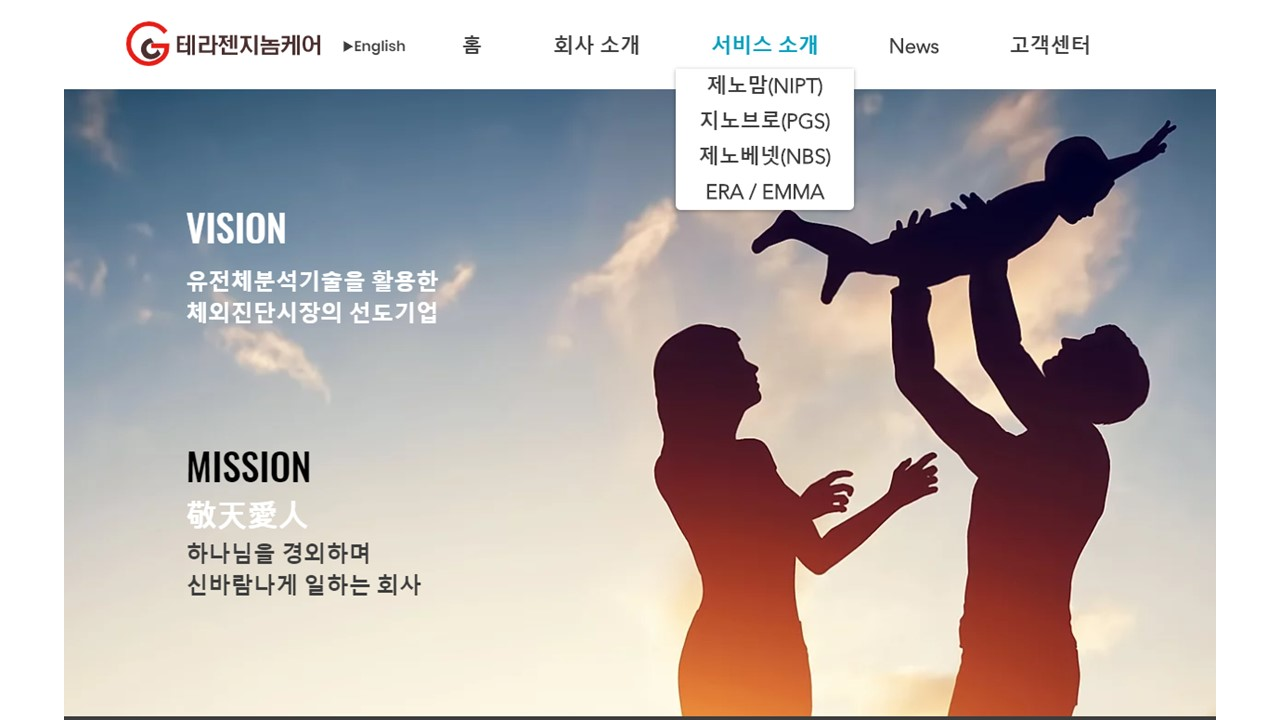

In [2]:
from IPython.display import Image
Image(filename='../../datas_not_to_upload/org.jpg')

In [ ]:
# !pip install jupyter_contrib_nbextensions
# or 
# ! conda install -c conda-forge jupyter_contrib_nbextensions

In [ ]:
#nbextension.PNG
from IPython.display import Image
Image(filename='nbextension.PNG')

# Import basic library, Prepare data sets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

## Load the data sets

In [ ]:
df = pd.read_csv("../../datas_not_to_upload/trgc10000.csv", nrows=5000)
y = pd.read_csv("../../datas_not_to_upload/gcbininfo_10000.csv", nrows=5000)

In [ ]:
df.head(3)

In [ ]:
## Removed First Column, there are many methods but we try drop column
try:
    df = df.drop(columns="Unnamed: 0")
    df.head(3)
except:
    print("Column Not exist")

In [ ]:
df.head(3)

In [ ]:
df.shape

In [ ]:
#df.describe() # Since there are More than 10000 Columns, describing() is meaning less

In [ ]:
## Drop Columns which sum is not greater than 100
np.array(df).shape
## Processing Speed will Fast if converted to Numpy 

In [ ]:
y.head(3)

## Divide data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_data(df,y,test_size=0.20, random_state = 10):
    return train_test_split(df, y,test_size=test_size, random_state=random_state )

In [ ]:
x_train,  x_test, y_train, y_test = split_data(df,y,test_size=0.2, random_state= 60)
x_train.shape , y_train.shape

# Ordinary Least Squares

LinearRegression fits a linear model with coefficients w = (w1,...wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

## Mean Absolute Error(MAE) : is the mean of the absolute value of the errors. It is caluclated as


## Mean Squared Error(MSE) is the mean of the squared errors and is calculated as :

## Root mean Squared Error(RMSE is the square root of the mean of the squared Errors:


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(x_train, y_train)
reg.coef_

In [ ]:
y_pred = reg.predict(x_test)

#### Accuracy and Errors

In [ ]:
print("Model Accuracy is : ", metrics.r2_score(y_test, y_pred))
## Let's find the values for these metrics using our test data
print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Errors(MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Root mean Squared(RMSE)" , metrics.mean_squared_error(y_test,y_pred,squared = True)) 
# Same as MSE squared option passed, MSE and RMSE almost same

### Since our Model only Predict 57.9 Percent Accuracy,
Is there any way to find better result ??

In [ ]:
x = 10
for i in range (1,20):
    x += 10
    print(x, end = "--")
    x_train_,  x_test_, y_train_, y_test_ = split_data(df, y,test_size=0.2, random_state= x)
    # x_train_ : renamin variable will help to avoid global and local variable conflicts
    
    print("Fittint Model is time consuming")
    reg_ = linear_model.LinearRegression().fit(x_train_, y_train_)
    y_pred_ = reg_.predict(x_test_)
    score = metrics.r2_score(y_test_, y_pred_)
    print(score)
    if score >0.57:
        print("in %d sample size Model Accuracy is : "%x, score)

In [ ]:
#y_test.to_numpy()

In [ ]:
lr_df = pd.DataFrame({"Actual":y_test.to_numpy().flatten(), "Predicted":y_pred.flatten()})
lr_df.head()

In [ ]:
sorted(abs(abs(lr_df.Predicted) - abs(lr_df.Actual)),reverse=True)

## Although this is bad way, But if we drop the index position from This Maximum wrong values 
## Our prediction Value will increase

In [ ]:
#y_test
#pd.DataFrame(data={"Predicted":y_pred.flatten()})
#pd.DataFrame(y_pred).head()

### Plot Graph

In [ ]:
lr_df.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()

# RIdge Regression

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge().fit(x_train, y_train)

In [ ]:
ridge_y_pred = reg.predict(x_test)
ridge_ = pd.DataFrame({"Actual":y_test.to_numpy().flatten(), "Predicted":ridge_y_pred.flatten()})
ridge_.head()

In [ ]:
print("Model Accuracy is : ", metrics.r2_score(y_test, ridge_y_pred))
ridge_.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()

### Lets Change alpha Value

In [ ]:
## Run For Loop  0.01 to 1.0 0.5 different with std deviation 0.05
x = 0
for i in range (1,21):
    x += 0.05
    print(x, end = "--")  
    # x_train_ : renamin variable will help to avoid global and local variable conflicts  
    print("Fittint Model is time consuming")
    reg_ = linear_model.Ridge(alpha=x).fit(x_train, y_train)
    y_pred_ = reg_.predict(x_test)
    score = metrics.r2_score(y_test, y_pred_)
    if score >0.58:
        print("in %d sample size Model Accuracy is : "%x, score)

**Since alpha Value 1 gives a best result, we can say there is no Lasso regression needed
although lets test Lasso**

# Lasso Regression

In [ ]:
from sklearn import linear_model 
lasso = linear_model.Lasso().fit(x_train, y_train) # Default a = 1
lasso_y_predict = lasso.predict(x_test)

In [ ]:
lasso_ = pd.DataFrame({"Actual":y_test.to_numpy().flatten(), "Predicted":lasso_y_predict.flatten()})
lasso_.head()

In [ ]:
print("Model Accuracy is : ", metrics.r2_score(y_test, lasso_y_predict))
lasso_.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()

In [ ]:
## Run For Loop  0.01 to 1.0 0.5 different with std deviation 0.05
x = 0
for i in range (1,21):
    x += 0.05
    print(x, end = "--")  
    # x_train_ : renamin variable will help to avoid global and local variable conflicts  
    print("Fittint Model is time consuming")
    reg_ = linear_model.Lasso(alpha=x).fit(x_train, y_train)
    y_pred_ = reg_.predict(x_test)
    score = metrics.r2_score(y_test, y_pred_)
    print(score)
    if score >0.58:
        print("in %d sample size Model Accuracy is : "%x, score)

# Elastic-Net
In the Scikit-Learn site, there we can see various models of Lasso Regression
## Multi-task Elastic-net
## Least Angel Regression

In [ ]:
## Elastic Net is a linear regression Model trained with both lambda1 l1  and  lambda2 l2
## Elastic-net is useful when there are multiple fetures which are correlated with one another.
## lasso and Ridge is that it allows Elastic-Net to ingerit some of Ridge's stability under rotation\



# LARS Lasso

In [ ]:
from sklearn import linear_model
lars_lasso = linear_model.LassoLars(alpha=1).fit(x_train, y_train)

In [ ]:
lars_y_pred = lars_lasso.predict(x_test)
lars = pd.DataFrame({"Actual":y_test.to_numpy().flatten(), "Predicted":lars_y_pred.flatten()})
lars.head()

In [ ]:
print("Model Accuracy is : ", metrics.r2_score(y_test, lars_y_pred))
lars.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()

In [ ]:
## Run For Loop  0.01 to 1.0 0.5 different with std deviation 0.05
x = 0
for i in range (1,21):
    x += 0.05
    print(x, end = "--")  
    # x_train_ : renamin variable will help to avoid global and local variable conflicts  
    print("Fittint Model is time consuming")
    lars_ = linear_model.LassoLars(alpha=x).fit(x_train, y_train)
    y_pred_ = lars_.predict(x_test)
    score = metrics.r2_score(y_test, y_pred_)
    print(score)
    if score >0.58:
        print("in %d sample size Model Accuracy is : "%x, score)

# Bayesian Regression

**Bayesian regression techniques can be used to include regularization parameters in the estimation procedure;
the regularizaiton parameter is not set in a hard sense but tuned to the data at hand.**

In [ ]:
x_train.shape

In [ ]:
bayesian = linear_model.BayesianRidge().fit(x_train, y_train)
bayesian_y_pred = bayesian.predict(x_test)

In [ ]:
bayesian_y_pred = bayesian.predict(x_test)
bayesian_ = pd.DataFrame({"Actual":y_test.to_numpy().flatten(), "Predicted":bayesian_y_pred.flatten()})
bayesian_.head()

In [ ]:
print("Model Accuracy is : ", metrics.r2_score(y_test, bayesian_y_pred))
bayesian_.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()

# Lets do in Professional way
`We do Only Ridge and Bayesian Model here because these 2 Models results are little bit better than Other Models`

In [ ]:
df = pd.read_csv("../../datas_not_to_upload/trgc10000.csv")
y = pd.read_csv("../../datas_not_to_upload/gcbininfo_10000.csv")
display(df.head(2))
display(y.head(2))

In [ ]:
## Lets Drop All Column if total sum is less than 10
## 10 does not have specific Meaning we just want to drop all Columns where 
## Total Sum is 0

df.drop([col for col, value in df.sum().iteritems() if value < 10],
        axis =1,inplace=True)

In [ ]:
y["GC"].sort_values(ascending = False).head(20)

In [ ]:
# We will merge and Drop all values greater than 25
df = pd.concat([y,df],axis=1)

In [ ]:
#df = df[df.GC < 25]
#df.iloc[:,1:].head()
df["GC"]

In [ ]:
## Split the Train & Test Data Sets
x_train, x_test , y_train, y_test = train_test_split(df.iloc[:,1:],df["GC"],test_size = 0.2,
                                                     random_state=42)

In [ ]:
x_train.shape, x_test.shape

## scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
## Fit Only in Train data set
scaler.fit(x_train)

In [ ]:
## Apply Scaler in both x_train and x_test 
x_train_ = scaler.transform(x_train)
x_test_ = scaler.transform(x_test)

In [ ]:
x_test_[:10]

In [ ]:
y_test.shape, bayesian_y_pred.shape

In [ ]:
bayesian_ = linear_model.BayesianRidge().fit(x_train_, y_train)
bayesian_y_pred_ = bayesian_.predict(x_test_)
bayesian_ = pd.DataFrame({"Actual":y_test.to_numpy().flatten(), "Predicted":bayesian_y_pred_.flatten()})
bayesian_.head()

In [ ]:
print("Model Accuracy is : ", metrics.r2_score(y_test, bayesian_y_pred_))
bayesian_.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()
# Befor removing GC greater than 25 72 % Accuracy

## PCA 

In [ ]:
## Import and Apply PCA
from sklearn.decomposition import PCA

In [ ]:
## From Loop testing, We Found that in 300 give better result
pca = PCA(300) # 50 Percent
# Notice the code below has 600 for the number of components parameter.
# It means that scikit-learn choose the minimum  number of principle
pca

In [ ]:
pca.fit(x_train)

In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train.shape, x_train_pca.shape # x_train_pca shape must be changed to 500

In [ ]:
#In the above we can see Column reduced to 100
# Lets Fit the Model
bayesian_ = linear_model.BayesianRidge(alpha_2=1e-06,lambda_1=1e-06,
                                       lambda_2=1e-06,alpha_init=None,
                                       lambda_init=None,compute_score=False,
                                       fit_intercept=True,normalize=False,
                                       copy_X=True,
                                       verbose=False,).fit(x_train_pca, np.ravel(y_train))
bayesian_y_pred = bayesian_.predict(x_test_pca)
bayesian_ = pd.DataFrame({"Actual":np.ravel(y_test),
                          "Predicted":bayesian_y_pred.flatten()})

print("Model Accuracy is : ", metrics.r2_score(y_test, bayesian_y_pred))
bayesian_.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()
bayesian_.head()

In [ ]:
## Lets Loop and Find Out the Best Parameters
x = 0
for i in range(1):
    x += 5
    bayesian__ = linear_model.BayesianRidge(n_iter=x,
                                           tol=0.001,
                                           alpha_1=1e-06,
                                           alpha_2=1e-06,
                                           lambda_1=1e-06,
                                           lambda_2=1e-06,
                                           alpha_init=None,
                                           lambda_init=None,
                                           compute_score=False,
                                           fit_intercept=True,
                                           normalize=False,
                                           copy_X=True,
                                           verbose=False).fit(
                                               x_train_pca, np.ravel(y_train))
    # ravel will change to Numpy array
    bayesian_y_pred_ = bayesian__.predict(x_test_pca)
    _ = metrics.r2_score(y_test, bayesian_y_pred_)
    print(_,end="--")
    if _ > 0.71:
        print("Accuracy is : ", _, x)

In [ ]:
np.ravel(x_test)

# Deep Learning

In [ ]:
import pathlib

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

print(tf.__version__)

In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

## Build the model

In [ ]:
x_train.shape , x_train_.shape , x_train_pca.shape

In [ ]:
x = 1
for i in range(100):
    i +=1
    print(i, "-->")
    model = keras.Sequential()
    model.add(layers.Dense(i, activation = "relu",
                       input_shape = [x_train_pca.shape[1],]))
    #model.add(layers.Dense(6, activation = "relu"))
    #model.add(layers.Dense(i, activation = "relu"))
    #model.add(layers.Dense(5, activation = "relu"))

    model.add(layers.Dense(1))

    # COmpile the Model
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer = optimizer, loss = "mse",
              metrics=["accuracy","mse"])

    ## Early Stops if fit (Which will help to stop Over Fitting)
    early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

    ## Fit the Model
    model.fit(x_train_pca,y_train, epochs=100, validation_split = 0.02, verbose = 0,
         callbacks = [early_stop, tfdocs.modeling.EpochDots()])

    ## Evaluate the Model
    loss, acc,_ = model.evaluate(x_test_pca, y_test, verbose = 0)
    print("Test Accuracy = %.3f"%acc, loss , _)
    keras_pred = model.predict(x_test_pca)
    print("Accuracy", metrics.r2_score(y_test, keras_pred))

    keras_ = pd.DataFrame({"Actual":y_test.to_numpy().flatten(),
                       "Predicted":keras_pred.flatten()})

    print("Model Accuracy is : ", metrics.r2_score(y_test, keras_pred))
    print(np.corrcoef(keras_["Actual"],keras_["Predicted"])[1][0])
    

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(4, activation = "relu",
                       input_shape = [x_train_pca.shape[1],]))
model.add(layers.Dense(2, activation = "relu"))
#model.add(layers.Dense(2, activation = "relu"))

model.add(layers.Dense(1))

# COmpile the Model
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer = optimizer, loss = "mse",
              metrics=["accuracy","mse"])

## Early Stops if fit (Which will help to stop Over Fitting)
early_stop = keras.callbacks.EarlyStopping(monitor="loss", patience=20)

## Fit the Model
model.fit(x_train_pca,y_train, epochs=100, validation_split = 0.02, verbose = 0,
         callbacks = [early_stop, tfdocs.modeling.EpochDots()])

## Evaluate the Model
loss, acc,_ = model.evaluate(x_test_pca, y_test, verbose = 0)
print("\nTest Accuracy = %.3f"%acc, loss , _)

##
keras_pred = model.predict(x_test_pca)
print("Accuracy", metrics.r2_score(y_test, keras_pred))

keras_ = pd.DataFrame({"Actual":y_test.to_numpy().flatten(),
                       "Predicted":keras_pred.flatten()})

print("Model Accuracy is : ", metrics.r2_score(y_test, keras_pred))
print(np.corrcoef(keras_["Actual"],keras_["Predicted"])[1][0])
bayesian_.head(100).plot(kind = "bar", figsize=(25, 10))
plt.grid(which="major", linestyle = "-", linewidth = "0.5")
plt.show()
display(keras_.head(100))

## Result 76.21 without kernel_in in 10 Epoch
## Result  63.  with kernel_in in 10 Epoch
## Lets Increase size

In [ ]:
model.summary()

# Thank You
**any suggestions and recommendataions are welcome at krishdb38@gmail.com**